In [3]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = "../data/raw/SMSSpamCollection"
data = pd.read_csv(filepath, sep='\t', header=None, names=['label', 'message'])

print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
class_distribution = data['label'].value_counts()
print(f"Class distribution: {class_distribution}")

Class distribution: label
ham     4825
spam     747
Name: count, dtype: int64


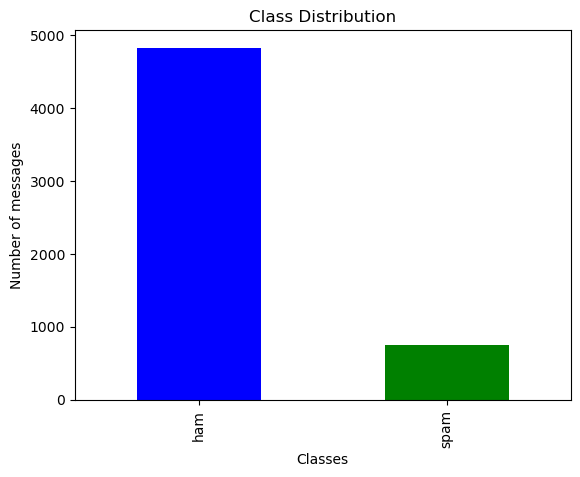

In [7]:
# Bar chart
class_distribution.plot(kind="bar", color=["blue", "green"])
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of messages")
plt.show()


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


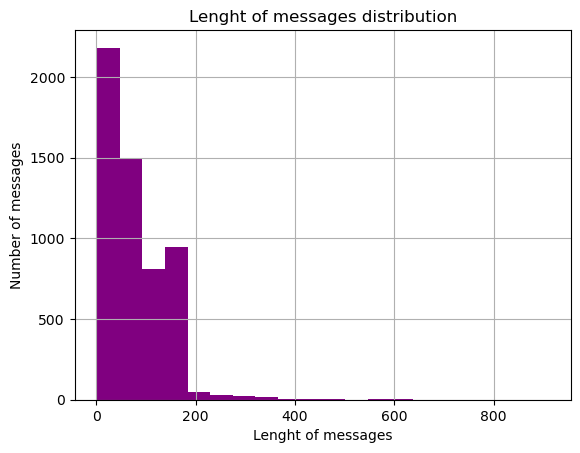

In [8]:
# New column with lenght of messages
data['message_length'] = data['message'].apply(len)

print(data['message_length'].describe())

# Istogram of lenght
data['message_length'].hist(bins=20, color='purple')
plt.title("Lenght of messages distribution")
plt.xlabel("Lenght of messages")
plt.ylabel("Number of messages")
plt.show()


In [10]:
# Average length per class
length_by_class = data.groupby('label')['message_length'].mean()
print(length_by_class)


label
ham      71.482487
spam    138.670683
Name: message_length, dtype: float64


In [25]:
# 10 most frequent words in spam messages
from collections import Counter

spam_words = Counter(" ".join(data[data['label'] == 'spam']['message']).split())

for word in list(spam_words.keys()):
    if len(word) < 4:
        del spam_words[word]

print(spam_words.most_common(10))


[('your', 187), ('call', 185), ('Call', 136), ('have', 128), ('from', 116), ('with', 101), ('FREE', 89), ('mobile', 81), ('claim', 73), ('Your', 71)]


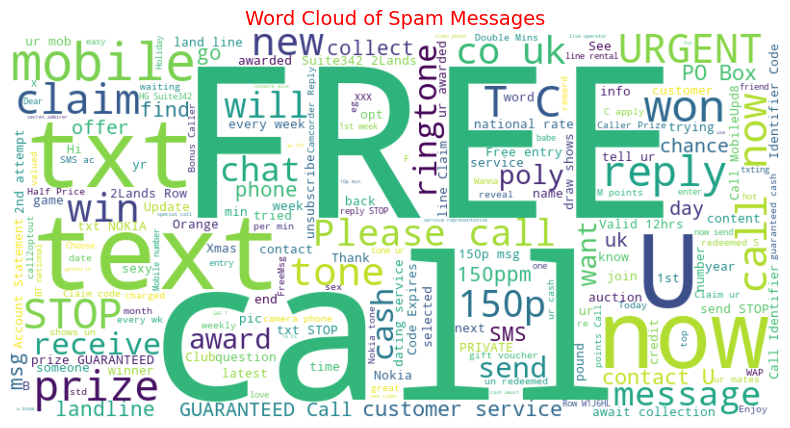

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Merge all spam messages into one string
spam_text = " ".join(data[data['label'] == 'spam']['message'])

# Create the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(spam_text)

# Visualizzare la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Word Cloud of Spam Messages", fontsize=14, color="red")
plt.show()
